In [126]:
import statistics as st
from scipy.stats import t
import json
from statistics import mode, mean
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [127]:
def asd(name, ipDest):
  responses = None
  with open(f'traceroute_results/{name}.json') as f:
    responses = json.load(f)
  res = []

  for ttl in responses: 
    ipModa = mode([ip for ip, rtt in responses[ttl]])
    promedioRTT = mean([rtt for ip, rtt in responses[ttl] if ip == ipModa])
    res.append((ttl, ipModa, promedioRTT))
    if ipDest == ipModa:
      break

  res.sort(key = lambda tupla: int(tupla[0]))

  saltos = []#(res[0][2], res[0][1])
  low = 0
  up = 1
  while up < len(res):
    while up < len(res) and res[up][2] - res[low][2] < 0:
      up += 1
    if up < len(res):
      saltos.append((res[up][2] - res[low][2], f'{res[low][1]}\nto\n{res[up][1]}'))
      low = up
      up += 1

  return res, saltos

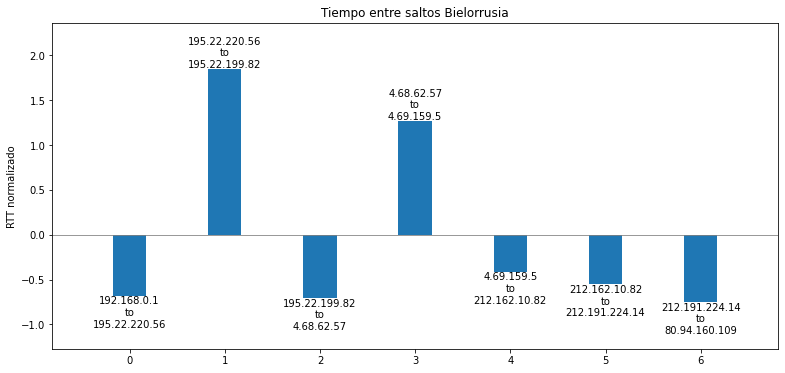

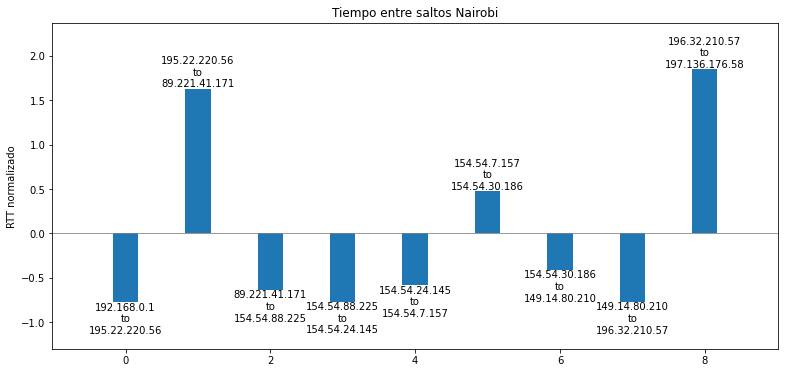

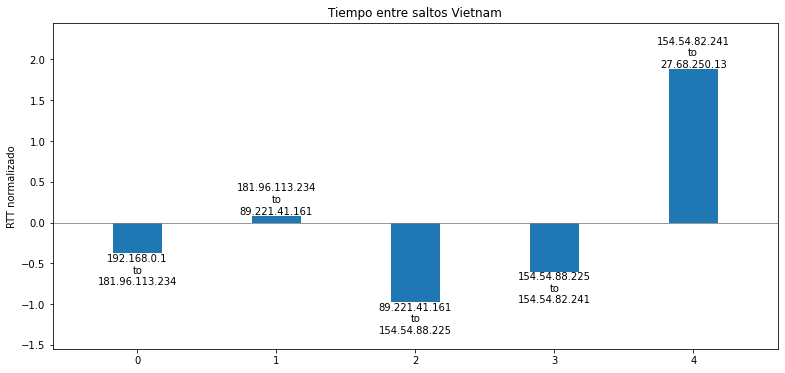

In [128]:
for name, ip, uni in [('bsu_by_responses', "217.21.43.35", 'Bielorrusia'), ('uonbi_ac_ke_responses', "41.204.161.206", 'Nairobi'), ('vnu_edu_vn_responses', "112.137.142.4", 'Vietnam')]:
  _, saltos = asd(name, ip)

  rtts = [[rtt] for rtt, ip in saltos]
  scaler = StandardScaler()
  normalized = [point[0] for point in scaler.fit_transform(rtts)]
  ips = [ip for rtt, ip in saltos]


  fig, ax = plt.subplots(figsize=(13, 6))
  ind=np.arange(len(saltos))
  width = 0.35 
  p1 = ax.bar(ind, normalized, width)

  ax.axhline(0, color='grey', linewidth=0.8)
  ax.set_ylabel('RTT normalizado')
  ax.set_title(f'Tiempo entre saltos {uni}')

  # Label with label_type 'center' instead of the default 'edge'
  ax.bar_label(p1, labels= ips, label_type='edge')
  plt.margins(0.1, 0.2)
  plt.show()

In [129]:
print(_)

[('1', '192.168.0.1', 70.46854496002197), ('6', '181.96.113.234', 119.8999285697937), ('7', '195.22.220.56', 74.12240505218506), ('8', '89.221.41.161', 207.11113611857095), ('10', '154.54.88.225', 207.4121634165446), ('11', '154.54.82.241', 238.5582129160563), ('12', '154.54.29.222', 236.17049853006998), ('13', '154.54.42.65', 235.36041577657065), ('14', '154.54.44.86', 236.51527563730875), ('15', '154.54.42.102', 236.04208628336588), ('16', '38.122.147.154', 232.59446620941162), ('17', '27.68.250.13', 473.82598718007404), ('18', '27.68.255.41', 473.4541654586792), ('19', '27.68.229.50', 469.0771182378133), ('20', '119.17.219.18', 467.9172356923421), ('21', '119.17.219.125', 471.5606212615967), ('22', '101.96.95.163', 470.8203633626302), ('23', '112.137.143.2', 472.4130153656006), ('24', '112.137.142.4', 468.6649401982625)]
